# Notebook for the study of the E.Coli Core model

# <font color='red'> [1] Build the model of E.Coli Core </font> 

## <font color='green'> [1.1] Importation of the package </font> 

In [1]:
import sys
sys.path.append('../')

from main import *

## <font color='green'> [1.2] Creation of the model and read of the SBTab file </font> 

In [2]:
model = MODEL()

SBTab_file = "../Exemples/SBTab/Model.tsv"
model.read_SBtab(filepath=SBTab_file)

## <font color='green'> [1.3] Read of premade options files </font> 

Options file can be read to add enzymes to every reaction, to consider them and the external metabolites as parameters of the model.

In [3]:
file_path = "../Exemples/SBTab/options.csv"
model.setup(file_path=file_path)

Name of the removed parameter : Temperature


In [4]:
model.parameters.df

,Mean values,Standard deviation
enzyme_ACALD_para,1.0,1.0
enzyme_ACALDt_para,1.0,1.0
enzyme_ACKr_para,1.0,1.0
enzyme_ACONTa_para,1.0,1.0
enzyme_ACONTb_para,1.0,1.0
...,...,...
h2o_e_para,1.0,1.0
nh4_e_para,1.0,1.0
o2_e_para,1.0,1.0
pi_e_para,1.0,1.0


The same for adding regulation arrows between metabolite and flux of the model.

In [5]:
file_reg = "../Exemples/SBTab/e_coli_core_regulation.tsv"
model.regulations.read_file(file_path=file_reg)

In [6]:
model.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation,Activated
direct inhibition f6p_c -> PFK,PFK,f6p_c,-1,allosteric,True
direct activation g6p_c -> PYK,PYK,g6p_c,1,allosteric,True


## <font color='green'> [1.4] Display the Escher map of E.Coli Core </font> 

We can display the reference state in a Escher map

In [7]:
model_path = "../Exemples/SBTab/e_coli_core_model.json"
map_path = "../Exemples/SBTab/e_coli_core_map.json"

In [8]:
model.escher_reference(model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.95062685, 'coa_c': 2.74, 'nad_c': 4.2256266, 'accoa_c': 1.21…

# <font color='red'> [2] Launch simulation </font> 

## <font color='green'> [2.1] Response matrix </font> 

Once your model is well-built and the elasticity matrices are well-defined, you can compute the linear response matrix $R$ of the system to parameter perturbation

In [9]:
model.R

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_BIOMASS_Ecoli_core_w_GAM_para,...,h_e_para,co2_e_para,for_e_para,fum_e_para,glc_e_para,h2o_e_para,nh4_e_para,o2_e_para,pi_e_para,succ_e_para
acald_c,-0.582756,1.417244,0.149806,-0.078272,-0.078272,0.149806,0.012038,-0.002391,0.108961,-0.004327,...,0.295825,-0.181478,-0.037829,0.026517,0.067108,-0.077023,-0.011812,-0.009901,0.037560,0.081149
coa_c,-0.178168,-0.178168,-0.072259,0.099207,0.099207,-0.072259,-0.006222,-0.072686,-0.049485,0.013485,...,-0.617051,0.005609,0.106432,-0.205560,-0.017726,0.358551,0.036814,0.046334,-0.025593,-0.237123
nad_c,-0.206554,-0.206554,0.003410,-0.158651,-0.158651,0.003410,-0.017071,-0.079973,-0.069317,-0.001223,...,0.584092,0.188003,-0.077897,0.112168,-0.030104,-0.129423,-0.003338,-0.043078,0.005814,-0.038161
accoa_c,0.295821,0.295821,0.206208,-0.347032,-0.347032,0.206208,0.012348,-0.226025,0.094550,0.000453,...,0.161269,-0.036429,-0.103153,0.060416,0.069897,-0.134276,0.001236,0.006693,0.073708,-0.144151
h_c,-0.052609,-0.052609,0.027964,-0.027606,-0.027606,0.027964,-0.028636,-0.011390,-0.064746,0.001933,...,0.981514,0.055089,-0.021866,0.011393,-0.013616,0.079935,0.005278,-0.066316,-0.012553,-0.006994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.002350,-0.002350,-0.033103,-0.028211,-0.028211,-0.033103,-0.008334,-0.168684,-0.005380,-0.002242,...,-0.007534,0.016861,-0.006428,-0.013313,0.022139,-0.015366,-0.006120,-0.004525,0.019445,0.009787
TALA,-0.007080,-0.007080,-0.002328,-0.015697,-0.015697,-0.002328,-0.005753,-0.013084,-0.013321,0.000244,...,-0.011001,0.002179,-0.003947,-0.000866,0.009455,-0.006879,0.000665,-0.000821,0.006028,-0.000857
TKT1,-0.007080,-0.007080,-0.002328,-0.015697,-0.015697,-0.002328,-0.005753,-0.013084,-0.013321,0.000244,...,-0.011001,0.002179,-0.003947,-0.000866,0.009455,-0.006879,0.000665,-0.000821,0.006028,-0.000857
TKT2,-0.007529,-0.007529,-0.001363,-0.015327,-0.015327,-0.001363,-0.003509,-0.013592,-0.008479,0.000015,...,-0.009366,0.002698,-0.003803,-0.001059,0.009935,-0.007420,0.000040,-0.000974,0.006665,-0.001309


## <font color='green'> [2.2] Covariance </font> 

The uncertainty on the parameters spreads through the cell and then leads to a certain variability in the internal components of the cell's metabolism

In [10]:
model.covariance
#gln_c = 46 !

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_BIOMASS_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.071041,-0.014609,0.005956,-0.004434,0.083347,-0.002350,-0.007080,-0.007080,-0.007529,-0.020616
enzyme_ACALDt_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.071041,-0.014609,0.005956,-0.004434,0.083347,-0.002350,-0.007080,-0.007080,-0.007529,-0.020616
enzyme_ACKr_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.076382,-0.003691,0.004743,-0.066525,0.024579,-0.033103,-0.002328,-0.002328,-0.001363,-0.005021
enzyme_ACONTa_para,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.007448,-0.031024,0.016624,-0.022228,0.063637,-0.028211,-0.015697,-0.015697,-0.015327,0.010619
enzyme_ACONTb_para,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.007448,-0.031024,0.016624,-0.022228,0.063637,-0.028211,-0.015697,-0.015697,-0.015327,0.010619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.002350,-0.002350,-0.033103,-0.028211,-0.028211,-0.033103,-0.008334,-0.168684,-0.005380,-0.002242,...,0.120300,0.030416,-0.012917,0.012892,-0.023483,0.176070,0.014826,0.014826,0.015590,-0.016715
TALA,-0.007080,-0.007080,-0.002328,-0.015697,-0.015697,-0.002328,-0.005753,-0.013084,-0.013321,0.000244,...,0.025585,0.030918,-0.015756,0.006366,0.005038,0.014826,0.015509,0.015509,0.015409,-0.008145
TKT1,-0.007080,-0.007080,-0.002328,-0.015697,-0.015697,-0.002328,-0.005753,-0.013084,-0.013321,0.000244,...,0.025585,0.030918,-0.015756,0.006366,0.005038,0.014826,0.015509,0.015509,0.015409,-0.008145
TKT2,-0.007529,-0.007529,-0.001363,-0.015327,-0.015327,-0.001363,-0.003509,-0.013592,-0.008479,0.000015,...,0.030876,0.030804,-0.015446,0.006746,0.005699,0.015590,0.015409,0.015409,0.015395,-0.009182


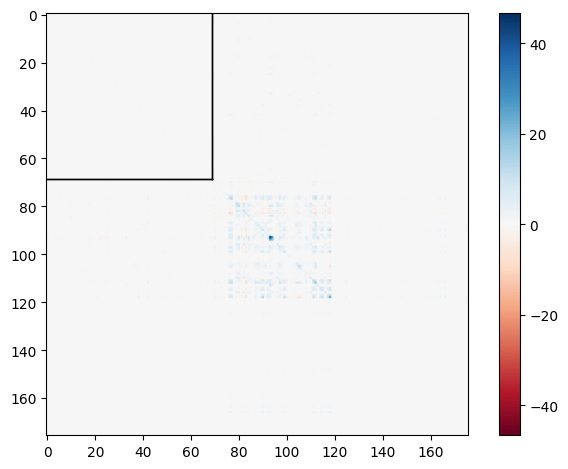

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: >,
 <matplotlib.image.AxesImage at 0x7895acb824d0>)

In [11]:
model.plot(result="cov")

Because the dependency between every elements of the model is linear, it is therefore possible to compute the matrix of correlation

In [12]:
model.rho()

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_BIOMASS_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.057282,-0.058804,0.046321,-0.006439,0.128015,-0.005600,-0.056851,-0.056851,-0.060684,-0.081884
enzyme_ACALDt_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.057282,-0.058804,0.046321,-0.006439,0.128015,-0.005600,-0.056851,-0.056851,-0.060684,-0.081884
enzyme_ACKr_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.061589,-0.014858,0.036885,-0.096602,0.037752,-0.078890,-0.018698,-0.018698,-0.010983,-0.019944
enzyme_ACONTa_para,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.006006,-0.124876,0.129288,-0.032278,0.097742,-0.067231,-0.126050,-0.126050,-0.123527,0.042175
enzyme_ACONTb_para,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.006006,-0.124876,0.129288,-0.032278,0.097742,-0.067231,-0.126050,-0.126050,-0.123527,0.042175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.005600,-0.005600,-0.078890,-0.067231,-0.067231,-0.078890,-0.019863,-0.402005,-0.012821,-0.005343,...,0.231172,0.291768,-0.239403,0.044615,-0.085957,1.000000,0.283726,0.283726,0.299441,-0.158223
TALA,-0.056851,-0.056851,-0.018698,-0.126050,-0.126050,-0.018698,-0.046193,-0.105065,-0.106965,0.001956,...,0.165658,0.999319,-0.983998,0.074228,0.062132,0.283726,1.000000,1.000000,0.997269,-0.259769
TKT1,-0.056851,-0.056851,-0.018698,-0.126050,-0.126050,-0.018698,-0.046193,-0.105065,-0.106965,0.001956,...,0.165658,0.999319,-0.983998,0.074228,0.062132,0.283726,1.000000,1.000000,0.997269,-0.259769
TKT2,-0.060684,-0.060684,-0.010983,-0.123527,-0.123527,-0.010983,-0.028281,-0.109549,-0.068341,0.000118,...,0.200656,0.999314,-0.968151,0.078951,0.070543,0.299441,0.997269,0.997269,1.000000,-0.293931


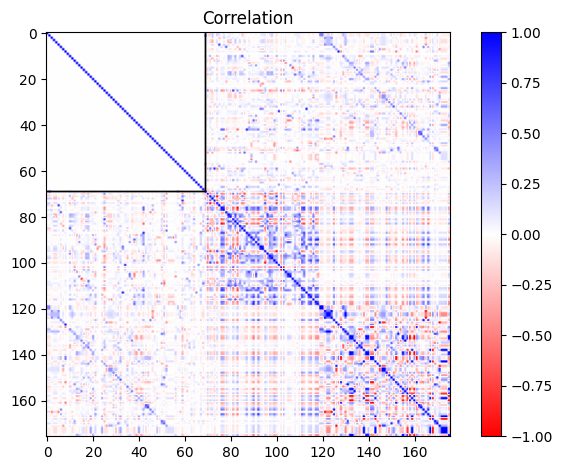

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x7895ac0ffa30>)

In [13]:
model.plot("rho")

The plot can be divided into 3 sections of elements.
- First, the parameters that are independent of each other
- Then The metabolites, on which the parameter doesn't have much impact because the parameter acts via the elasticity
- Finally, the flux. We can observe a diagonal of positive correlation between flux and parameters due to the impact of the enzyme. Furthermore, the same flux is influenced by a lot of metabolites. The fluxes that have the same behavior as metabolites are mostly aligned. In the case of a linear network without branches, the flux would be correlated.

## <font color='green'> [2.3] Value of information in the cell </font> 

The uncertainty on internal components of the cell results in a transmission of information through the system. We can therefore use the shared information as a metric of dependency between the elements.

In [14]:
model.MI

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_BIOMASS_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,inf,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,...,0.001643,0.001732,0.001074,0.000021,0.008262,0.000016,0.001619,0.001619,0.001845,0.003364
enzyme_ACALDt_para,-0.000000,inf,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,...,0.001643,0.001732,0.001074,0.000021,0.008262,0.000016,0.001619,0.001619,0.001845,0.003364
enzyme_ACKr_para,-0.000000,-0.000000,inf,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,...,0.001900,0.000110,0.000681,0.004688,0.000713,0.003122,0.000175,0.000175,0.000060,0.000199
enzyme_ACONTa_para,-0.000000,-0.000000,-0.000000,inf,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,...,0.000018,0.007858,0.008428,0.000521,0.004800,0.002265,0.008008,0.008008,0.007688,0.000890
enzyme_ACONTb_para,-0.000000,-0.000000,-0.000000,-0.000000,inf,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,...,0.000018,0.007858,0.008428,0.000521,0.004800,0.002265,0.008008,0.008008,0.007688,0.000890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,0.000016,0.000016,0.003122,0.002265,0.002265,0.003122,0.000197,0.088135,0.000082,1.427359e-05,...,0.027461,0.044486,0.029511,0.000996,0.003708,inf,0.041963,0.041963,0.046971,0.012677
TALA,0.001619,0.001619,0.000175,0.008008,0.008008,0.000175,0.001068,0.005550,0.005754,1.912266e-06,...,0.013913,3.299901,1.724972,0.002763,0.001934,0.041963,inf,inf,2.605596,0.034932
TKT1,0.001619,0.001619,0.000175,0.008008,0.008008,0.000175,0.001068,0.005550,0.005754,1.912266e-06,...,0.013913,3.299901,1.724972,0.002763,0.001934,0.041963,inf,inf,2.605596,0.034932
TKT2,0.001845,0.001845,0.000060,0.007688,0.007688,0.000060,0.000400,0.006037,0.002341,6.956287e-09,...,0.020548,3.296222,1.384821,0.003126,0.002494,0.046971,2.605596,2.605596,inf,0.045179


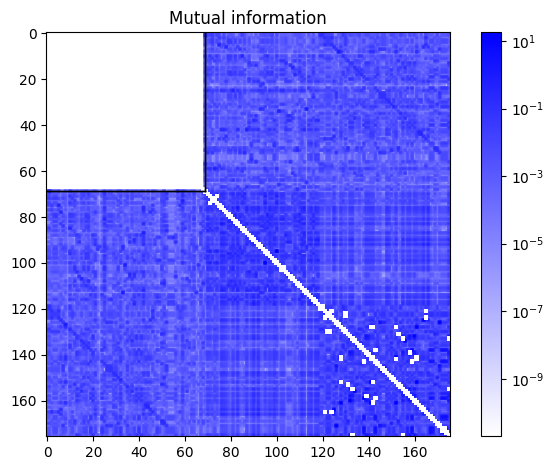

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Mutual information'}>,
 <matplotlib.image.AxesImage at 0x7895a4f6ceb0>)

In [15]:
model.plot(result="MI")

For a clearer analysis, you can display an Escher map of the mutual information between an element of the model and internal components of the system

In [16]:
model.escher_information(studied="atp_c", result="MI", model_json=model_path, map_json=map_path)

/home/alequertier/.local/lib/python3.10/site-packages/jupyter_client/session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Builder(height=600, metabolite_data={'acald_c': 0.00636298451006378, 'coa_c': 0.16242770852948296, 'nad_c': 0.…

The ATP and Biomass production have a negative correlation ?!

## <font color='green'> [2.4] Reducing the uncertainty by measuring a component </font> 

You can study the influence of the resolution of uncertainty of an element of the model by fixing its value

In [17]:
SD, mean = model.group_entropy_fixed_vector(elements_to_fixe="atp_c", elements_to_study=[], new_mean_fixed=4.0, return_all=True)

SD

,Old SD,New SD,Delta SD
enzyme_ACALD_para,1.000000,0.999986,0.000014
enzyme_ACALDt_para,1.000000,0.999986,0.000014
enzyme_ACKr_para,1.000000,0.998133,0.001867
enzyme_ACONTa_para,1.000000,0.999978,0.000022
enzyme_ACONTb_para,1.000000,0.999978,0.000022
...,...,...,...
SUCOAS,0.419607,0.415846,0.003761
TALA,0.124533,0.123992,0.000542
TKT1,0.124533,0.123992,0.000542
TKT2,0.124076,0.123192,0.000884


Fixing a value will lead to a reduction of entropy equal to the amount of information shared with the fixed element

In [18]:
model.group_entropy_fixed_vector(elements_to_fixe=["atp_c"], elements_to_study=[], new_mean_fixed=[4.0])

,Old H,New H,Delta H
enzyme_ACALD_para,1.918939,1.918924,-0.000014
enzyme_ACALDt_para,1.918939,1.918924,-0.000014
enzyme_ACKr_para,1.918939,1.917070,-0.001868
enzyme_ACONTa_para,1.918939,1.918916,-0.000022
enzyme_ACONTb_para,1.918939,1.918916,-0.000022
...,...,...,...
SUCOAS,1.050502,1.041499,-0.009003
TALA,-0.164244,-0.168602,-0.004358
TKT1,-0.164244,-0.168602,-0.004358
TKT2,-0.167923,-0.175069,-0.007147


In [19]:
N_ela = 10
import random

modified_elasticity = []
elasticity_value = []

for i in range(N_ela) :
    flux = random.choice(model.elasticity.s.df.index)
    meta = random.choice(model.elasticity.s.df.columns)
    modified_elasticity.append([flux, meta])

    elasticity_value.append(np.random.uniform(-1.0, 1.0))

model.MOO(modified_elasticity, elasticity_value, print_result=True)

[INFO 2024-04-11 17:07:15] Starting unique-name/2024-04-11-17-07-15-.log!
INFO:unique-name/2024-04-11-17-07-15-.log:Starting unique-name/2024-04-11-17-07-15-.log!
[INFO 2024-04-11 17:07:15] Hi, I am a program, starting now !

INFO:unique-name/2024-04-11-17-07-15-.log:Hi, I am a program, starting now !

DEBUG:unique-name/2024-04-11-17-07-15-.log:<class 'logging.Logger'>
[INFO 2024-04-11 17:07:15] Starting experiment with random seed 42...
INFO:unique-name/2024-04-11-17-07-15-.log:Starting experiment with random seed 42...


DEBUG:unique-name/2024-04-11-17-07-15-.log:generating initial population
DEBUG:unique-name/2024-04-11-17-07-15-.log:evaluating initial population
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 0] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 1] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 3] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 2] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 5] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 7] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 4] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 6] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 0] Evaluation finished.
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 0] Starting evaluation...
DEBUG:unique-name/2024-04-11-17-07-15-.log:[Thread 1] Evaluation finished.
DEBUG:uniqu



Best elasticity : 
                          acald_c  coa_c     nad_c  accoa_c     h_c    nadh_c  \
ACALD                         0.5  0.500  0.500000   -0.500  -0.500 -0.500000   
ACALDt                       -0.5 -0.000 -0.000000   -0.000  -0.000 -0.000000   
ACKr                         -0.0 -0.000 -0.000000   -0.000  -0.000 -0.000000   
ACONTa                       -0.0 -0.000 -0.000000   -0.000  -0.000 -0.000000   
ACONTb                       -0.0 -0.000 -0.000000   -0.000  -0.000 -0.000000   
ACt2r                        -0.0 -0.000 -0.000000   -0.000  -0.500 -0.000000   
ADK1                         -0.0 -0.000 -0.000000   -0.000  -0.000 -0.000000   
AKGDH                        -0.0  0.500  0.500000   -0.000  -0.000 -0.500000   
ATPM                         -0.0 -0.000 -0.000000   -0.000  -0.500 -0.000000   
BIOMASS_Ecoli_core_w_GAM     -0.0 -1.875  1.775000    1.875 -29.905 -1.775000   
CO2t                         -0.0 -0.000 -0.000000   -0.000  -0.000 -0.000000   
CS     

In [20]:
ftytu

NameError: name 'ftytu' is not defined

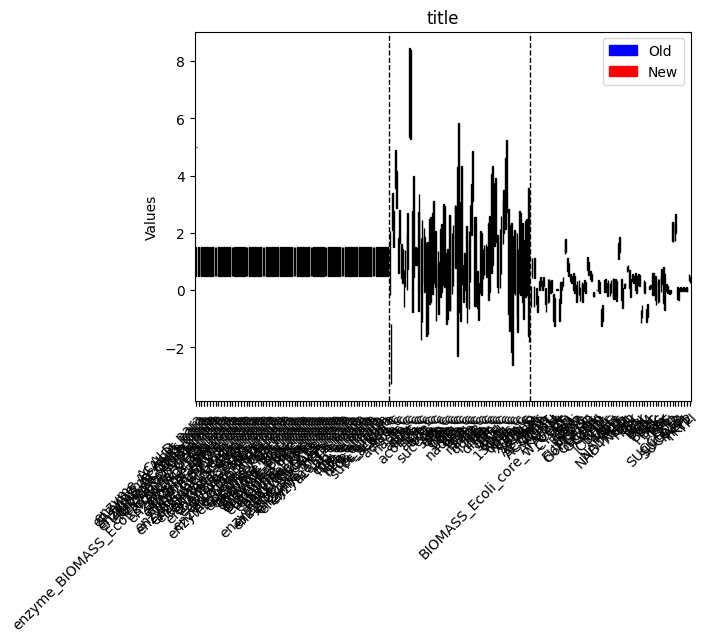

In [ ]:
model.graphic_interface()

Furthermore, fixing an element to a value other than its original mean will lead to a change in the means of every other distributions

In [ ]:
model.escher_mean_deviation(fixed_element="atp_c", fixed_value=4.0, model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.7074073170527586, 'coa_c': 0.6400188078909479, 'nad_c': -0.5…

In [ ]:
zret

NameError: name 'zret' is not defined

In [9]:
a = "ABC"

if a.lower()[0] == "a":
    print(a)

ABC


## <font color='green'> [2.5] regroup enzymes into operons </font> 

Enzymes that are implied in the same task can be initiated by the same genes. In this case, we can regroup them into operons. Then, as parameters they will share a certain covariance. 

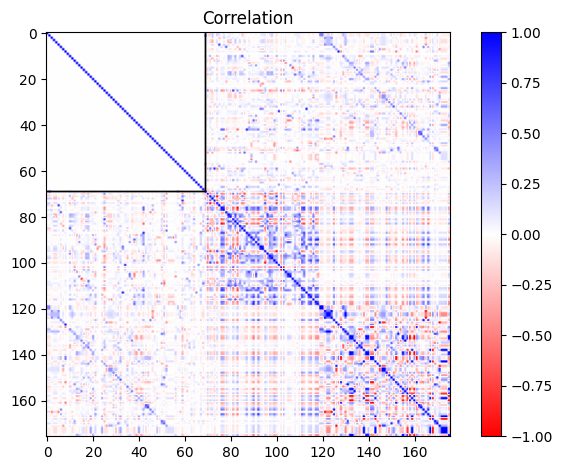

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x70613a2b5c30>)

In [ ]:
model.plot(result="rho")

In [ ]:
enzyme_gly = ["PFK", "FBA", "TPI", "GAPD", "PGK", "PGM", "PYK"]

for i in range(len(enzyme_gly)) :
    enzyme_gly[i] = "enzyme_" + enzyme_gly[i]

model.operons.add(name="Glycolyse", enzymes_linked=enzyme_gly , mixed_covariance=0.5)


enzyme_phosphate = ["G6PDH2r", "GND", "TALA", "TKT2"]

for i in range(len(enzyme_phosphate)) :
    enzyme_phosphate[i] = "enzyme_" + enzyme_phosphate[i]

model.operons.add(name="pentose phosphate", enzymes_linked=enzyme_phosphate , mixed_covariance=0.5)